In [1]:
import pandas as pd
import datautils
import modelutils as mu
import time
import matplotlib.pyplot as plt
import numpy as np
import itertools

## DATASET IMPORTING

In [2]:
DATASET = "Dataset/ML-CUP23-TR.csv"
df_cup = pd.read_csv(DATASET, skiprows=6)
df_cup.rename(columns={"# Training set: ID": "ID"}, inplace=True)

df_cup.info()

DESIGN_SIZE = 0.8
TRAIN_SIZE = 0.8

df_design, df_test = datautils.hold_out(df_cup, DESIGN_SIZE)
df_train, df_val = datautils.hold_out(df_design, TRAIN_SIZE)
X_train, y_train = datautils.obtain_features_targets(df_train)
X_val, y_val = datautils.obtain_features_targets(df_val)
X_test, y_test = datautils.obtain_features_targets(df_test)

input_size = X_train.shape[1]
output_size = y_train.shape[1]

print(df_cup.head())
print(len(df_train), len(df_val), len(df_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   int64  
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   float64
 5   x5      1000 non-null   float64
 6   x6      1000 non-null   float64
 7   x7      1000 non-null   float64
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     1000 non-null   float64
 11  y1      1000 non-null   float64
 12  y2      1000 non-null   float64
 13  y3      1000 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 109.5 KB
   ID        x1        x2        x3        x4        x5        x6        x7  \
0   1 -0.917280 -0.712727 -0.989904  0.992819  0.993649  0.995543  0.711074   
1   2 -0.858784  0.998755 -0.998396  0.999909  0.316503 -0.951897 -0.163139   
2   3 -0.990

In [3]:
RESULTS = "Results/"

## LOSS CALCULATION

Implemented Solving

In [5]:
hyperparameters = {
    "Hidden size": [50],
    "Alpha": [1e-8],
    "Initialization type": ["fan-in"],
}

plottrainlossch = []
plotvallossch = []
plothiddentimech = []


best_loss = float("inf")
best_loss_val = float("inf")

for h, alpha, init_type in itertools.product(*hyperparameters.values()):

    results_dict = {
        "Hidden size": [],
        "Alpha": [],
        "Seed": [],
        "Initialization type": [],
        "Train": [],
        "Validation": [],
        "Time": [],
    }

    print(
        "Hidden size:", h, "Alpha:", alpha, "Initialization type:", init_type
    )

    for seed in range(10):
        print(seed)
        # initialize the model
        elm = mu.ELM(
            input_size,
            h,
            output_size,
            seed=seed,
            init=init_type,
        )

        start_time = time.process_time()

        # train with implemented method
        elm.compute_wout_system(X_train, y_train, alpha=alpha)
        # train with numpy method
        # elm.compute_wout_system_np(X_train, y_train, alpha=alpha)
        end_time = time.process_time()

        # Training loss
        train_pred = elm.predict(x=X_train)
        loss_train = mu.compute_loss(y_train, train_pred, alpha=alpha)
        # train_variance = mu.compute_variance(y_train, train_pred)

        # Validation loss
        val_pred = elm.predict(x=X_val)
        loss_val = mu.compute_loss(y_val, val_pred)
        # val_variance = mu.compute_variance(y_val, val_pred)

        print("Train loss:", loss_train)
        print("Validation loss:", loss_val)

        # save results
        results_dict["Hidden size"].append(h)
        results_dict["Alpha"].append(alpha)
        results_dict["Seed"].append(seed)
        results_dict["Initialization type"].append(init_type)
        results_dict["Train"].append(loss_train)
        results_dict["Validation"].append(loss_val)
        results_dict["Time"].append(end_time - start_time)

        """
        if loss_val < best_loss_val:
            best_loss_val = loss_val
            best_loss_train = loss_train
            best_variance_train = train_variance
            best_variance_val = val_variance
            best_params = (h, alpha, init_type)
            best_seed = seed
            best_model = elm
            """

    # save results to csv
    results_df = pd.DataFrame(results_dict)
    results_df.to_csv(
        RESULTS + f"sysres_{h}_{alpha}_{init_type}.csv",
        index=False,
    )

Hidden size: 50 Alpha: 1e-08 Initialization type: fan-in
0
Train loss: 8.567155949579611
Validation loss: 13.904019673868287
1
Train loss: 8.628843750964181
Validation loss: 13.743433747655757
2
Train loss: 8.88062340031656
Validation loss: 13.718810819775678
3
Train loss: 5.034937711837664
Validation loss: 6.529579599578907
4
Train loss: 5.786120802188437
Validation loss: 7.54996099104839
5
Train loss: 7.925883118114735
Validation loss: 12.390758743610634
6
Train loss: 7.745266079401415
Validation loss: 10.245097724205959
7
Train loss: 9.017973043888595
Validation loss: 14.359215756298042
8
Train loss: 7.804573090465645
Validation loss: 11.166553312056186
9
Train loss: 5.947865777840877
Validation loss: 8.718756929652969


Np solving

In [ ]:
hyperparameters = {
    "Hidden size": range(50, 500),
    "Alpha": [-1],
    "Initialization type": ["fan-in"],
}

param_grid = list(ParameterGrid(hyperparameters))

plottrainlossnp = []
plotvallossnp = []
plothiddentimenp = []


best_loss = float("inf")

for params in param_grid:
    meanlosstrain = 0
    meanlossval = 0
    meanhiddentimenp = 0
    print(params)
    value = 10 ** params["Alpha"]

    for seed in range(1, 10):
        print(seed)
        # initialize the model
        elm = mu.ELM(
            input_size,
            params["Hidden size"],
            output_size,
            seed=seed,
            init=params["Initialization type"],
        )
        # measure the time

        start_time = time.process_time()

        # train with implemented method
        # elm.compute_wout_system(X_train, y_train, alpha=value)
        # train with numpy method
        elm.compute_wout_system_np(X_train, y_train, alpha=value)

        # Training loss
        train_pred = elm.predict(x=X_train)
        loss_train = mu.compute_loss(y_train, train_pred)
        train_variance = mu.compute_variance(y_train, train_pred)
        meanlosstrain += loss_train

        # Validation loss
        val_pred = elm.predict(x=X_val)
        loss_val = mu.compute_loss(y_val, val_pred)
        val_variance = mu.compute_variance(y_val, val_pred)
        meanlossval += loss_val

        end_time = time.process_time()

        # save the results

        if loss_val < best_loss:
            best_loss_val = loss_val
            best_loss_train = loss_train
            best_variance_train = train_variance
            best_variance_val = val_variance
            best_params = params
            best_seed = seed
            best_model = elm

        meanhiddentimenp += end_time - start_time

    meanlosstrain /= 9
    meanlossval /= 9
    meanhiddentimenp /= 9

    # Plot the results
    plottrainlossnp.append((params["Hidden size"], meanlosstrain))
    plotvallossnp.append((params["Hidden size"], meanlossval))
    plothiddentimenp.append((params["Hidden size"], meanhiddentimenp))

    """results = pd.DataFrame(results_dict)
    results.to_csv(RESULTS + "results_systemresolution.csv", index=False)
    # Save the results
    results_dict["Hidden size"].append(params["Hidden size"])
    results_dict["Alpha"].append(value)
    results_dict["Initialization type"].append(params["Initialization type"])
    results_dict["Train"].append(meanlosstrain)
    results_dict["Validation"].append(meanlossval)
    results_dict["Time"].append(meanhiddentime)"""

print("Best parameters:")
print(best_params)
print("Seed")
print(best_seed)
print("Best loss train:")
print(best_loss_train)
print("Best variance train:")
print(best_variance_train)
print("Best loss val:")
print(best_loss_val)
print("Best variance val:")
print(best_variance_val)
print(plothiddentimenp)

{'Alpha': -1, 'Hidden size': 50, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 51, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 52, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 53, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 54, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 55, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 56, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 57, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 58, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 59, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 60, 'Initialization type': 'fan-in'}
1
2
3
4
5
6
7
8
9
{'Alpha': -1, 'Hidden size': 61, 'Initialization type': 'fan-in'}
1
2
3
4
5


In [ ]:
# Now we print the difference between the two methods
plottrainlossch = np.array(plottrainlossch)
plotvallossch = np.array(plotvallossch)

plottrainlossnp = np.array(plottrainlossnp)
plotvallossnp = np.array(plotvallossnp)

# print the difference between the two methods with the norm
print(np.linalg.norm(plottrainlossch[:, 1] - plottrainlossnp[:, 1]))
print(np.linalg.norm(plotvallossch[:, 1] - plotvallossnp[:, 1]))

## Conditioning calculation

In [4]:
plottrainalphaloss = []
plotvalalphaloss = []
plothiddentime = []


hidden = [50, 100, 1000, 2000]
alpha = range(-10, 0)


best_loss = float("inf")
totalarray = []
for alp in alpha:
    print("alpha")
    print(alp)
    alphaarray = [alp]

    for hid in hidden:
        print("hidden")
        print(hid)
        value = 10**alp
        seedmean = 0
        for seed in range(1, 10):
            print(seed)
            # initialize the model
            elm = mu.ELM(
                input_size,
                hid,
                output_size,
                seed=seed,
                init="fan-in",
            )

            cond = elm.condition_number_m(X_train, alpha=value)
            print(cond)
            seedmean += cond

        seedmean /= 9

        alphaarray.append(seedmean)

    totalarray.append(alphaarray)

print(totalarray)

alpha
-10
hidden
50
1
366027.5745312528
2
134689.98344216918
3
77678.58406575477
4
91626.650176974
5
223886.7454479187
6
159601.94183027564
7
138619.75456590956
8
102967.92764456212
9
140092.6725588671
hidden
100
1
2959999.8652272215
2
2360198.851015431
3
2605159.7578356313
4
3959054.646628168
5
1982004.6279722597
6
6228803.945757016
7
3301136.1070917756
8
2724418.764188946
9
2276120.1760173673
hidden
1000
1
1229933170065299.2
2
1300223830377639.8
3
1351258609619253.2
4
1168949838086195.0
5
1242666667168892.8
6
1411960656918938.2
7
1386396251259687.2
8
1310160019927301.2
9
1138982514775683.5
hidden
2000
1
5906415184336614.0
2
7314706208167530.0
3
4609012391637015.0
4
1.3330987178356032e+16
5
6631761853568914.0
6
5287931593362065.0
7
5150839188808995.0
8
7576629142933515.0
9
6800392233070170.0
alpha
-9
hidden
50
1
366027.5467909616
2
134689.98040405838
3
77678.58244823245
4
91626.64859337371
5
223886.7364936557
6
159601.93662252047
7
138619.75108375066
8
102967.92558695635
9
140092.6692

## PLOTS

Cholensky Loss 

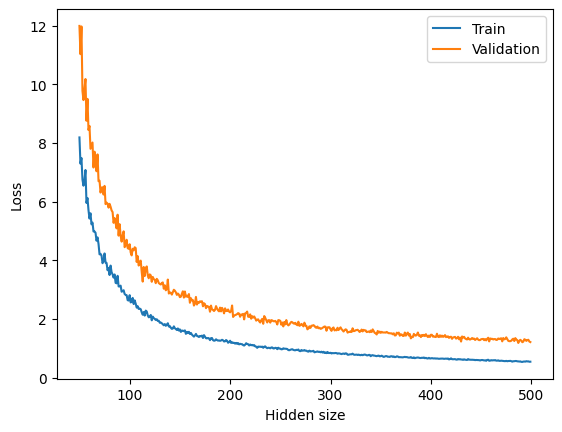

In [ ]:
plotpointstrain = np.array(plottrainlossch)
plotpointsval = np.array(plotvallossch)


plt.plot(plotpointstrain[:, 0], plotpointstrain[:, 1], label="Train")
plt.plot(plotpointsval[:, 0], plotpointsval[:, 1], label="Validation")

plt.xlabel("Hidden size")
plt.ylabel("Loss")
plt.legend()
plt.show()

Np loss

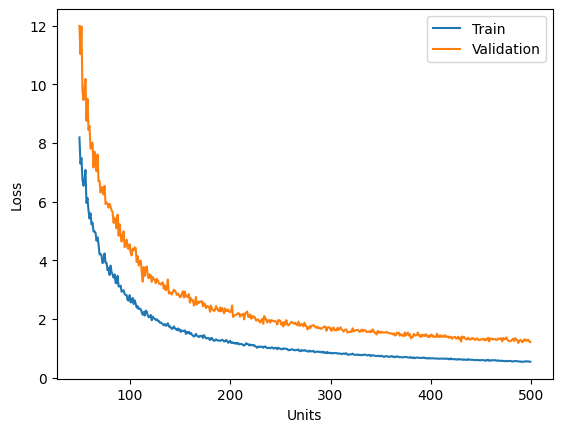

In [ ]:
plottrainnp = np.array(plottrainlossnp)
plotvalnp = np.array(plotvallossnp)

plt.plot(plottrainnp[:, 0], plottrainnp[:, 1], label="Train")
plt.plot(plotvalnp[:, 0], plotvalnp[:, 1], label="Validation")

# plt.yscale("log")
plt.xlabel("Units")
plt.ylabel("Loss")
plt.legend()
plt.show()

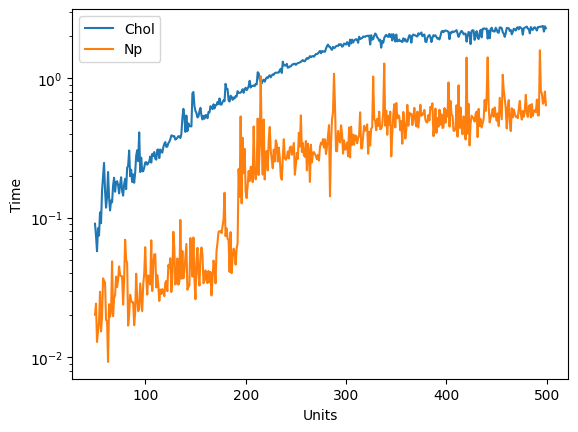

In [96]:
plottime = np.array(plothiddentimech)
plottime2 = np.array(plothiddentimenp)
plt.plot(plottime[:, 0], plottime[:, 1], label="Chol")
plt.plot(plottime[:, 0], plottime2[:, 1], label="Np")

plt.yscale("log")
plt.xlabel("Units")
plt.ylabel("Time")
plt.legend()
plt.show()